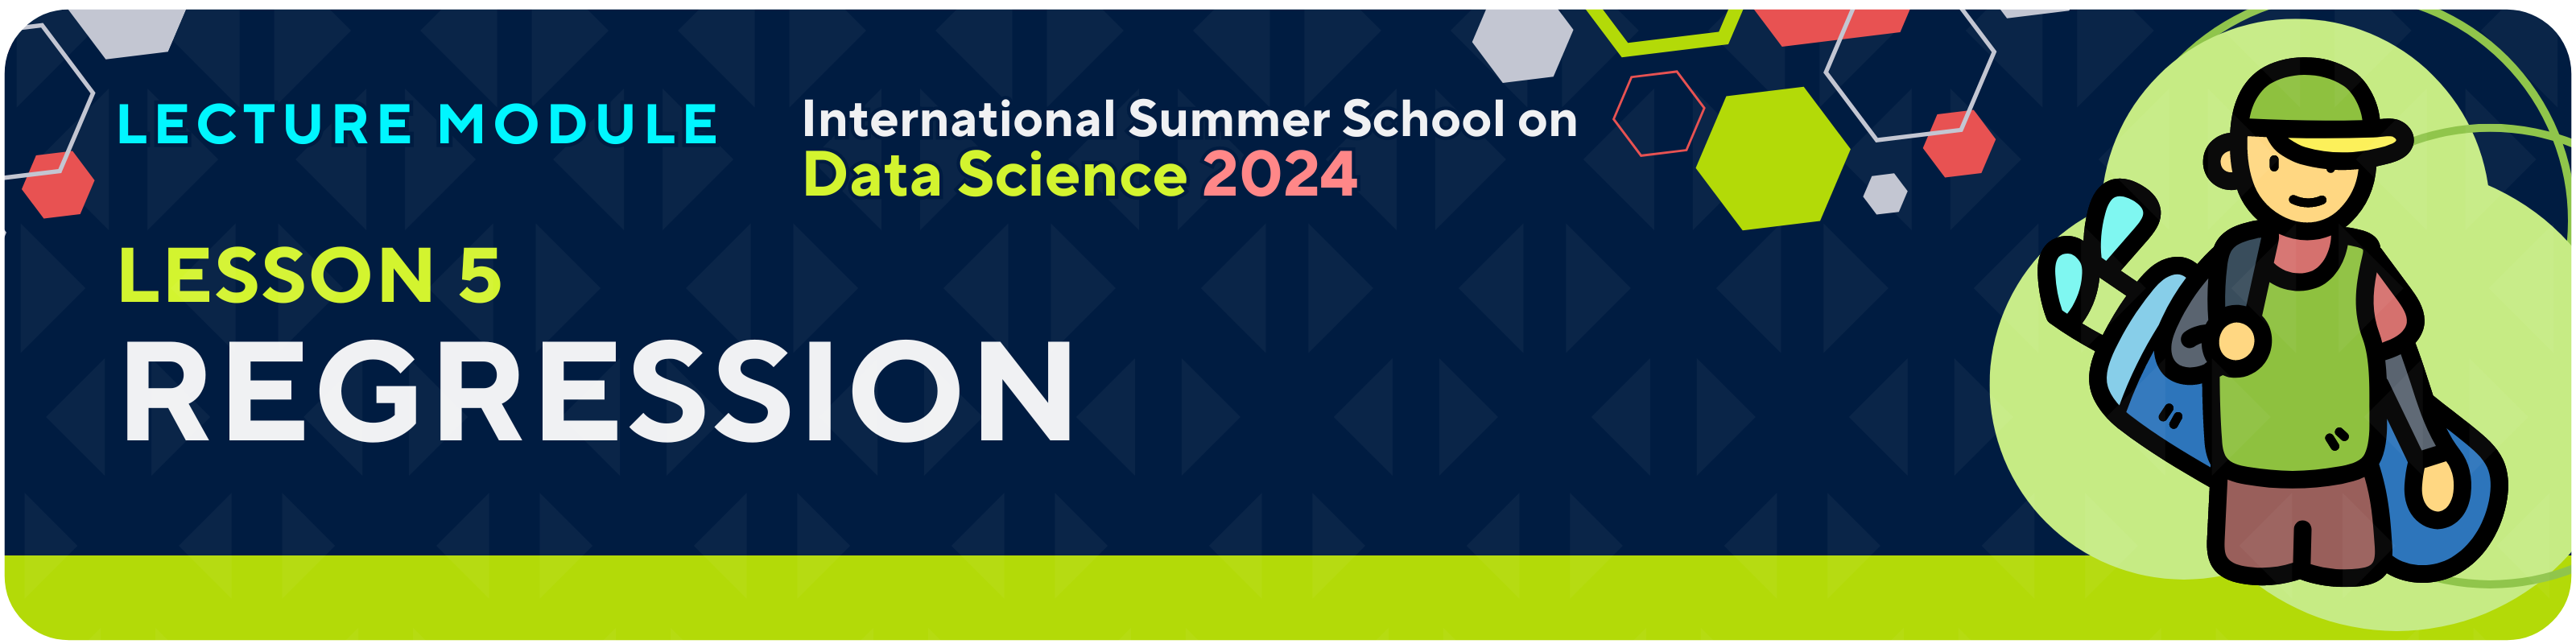

<div class='markdown-google-sans'>

## **04.6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Support Vector Machine**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Support Vector Machine**
</div>
<img src="https://i.imgur.com/sLr9EqY.png" width=800 />

<img src="https://i.imgur.com/2H7JxdS.png" width=800 />

<img src="https://i.imgur.com/0EO1BbZ.png" width=800 />

<img src="https://i.imgur.com/uBU9YP3.png" width=800 />

<img src="https://i.imgur.com/vPHHx6R.png" width=800 />

<img src="https://i.imgur.com/REyKIBY.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/bEuS2zZ.png" width=800 />

<img src="https://i.imgur.com/LerL8QS.png" width=800 />

<img src="https://i.imgur.com/RhpVC0H.png" width=800 />

<img src="https://i.imgur.com/tSpxKKE.png" width=800 />

<img src="https://i.imgur.com/cnmo0Z0.png" width=800 />

<img src="https://i.imgur.com/GaHftSO.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=800 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# REORDER THE DATAFRAME
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play']]

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play
0       1         0     0         85.0      85.0     0     0
1       1         0     0         80.0      90.0     1     0
2       0         1     0         83.0      78.0     0     1
3       0         0     1         70.0      96.0     0     1
4       0         0     1         68.0      80.0     0     1
5       0         0     1         65.0      70.0     1     0
6       0         1     0         64.0      65.0     1     1
7       1         0     0         72.0      95.0     0     0
8       1         0     0         69.0      70.0     0     1
9       0         0     1         75.0      80.0     0     1
10      1         0     0         75.0      70.0     1     1
11      0         1     0         72.0      90.0     1     1
12      0         1     0         81.0      75.0     0     1
13      0         0     1         71.0      80.0     1     0 

    sunny  overcast  rain  Temperature  Humidity  Wind  Play
14      1         0   

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/R6WXfeS.png" width=800 />



In [ ]:
from sklearn.preprocessing import StandardScaler

# STANDARDIZE NUMERICAL COLUMNS ── Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(X_train[float_cols].round(2), '\n')
print(X_test[float_cols].round(2))

    Temperature  Humidity
0          1.80      0.50
1          1.02      1.02
2          1.49     -0.24
3         -0.56      1.66
4         -0.88     -0.03
5         -1.35     -1.08
6         -1.51     -1.61
7         -0.25      1.55
8         -0.72     -1.08
9          0.23     -0.03
10         0.23     -1.08
11        -0.25      1.02
12         1.17     -0.56
13        -0.41     -0.03 

    Temperature  Humidity
14         1.17      0.81
15         0.07      1.24
16         0.38      0.50
17         0.70     -0.56
18         1.33      1.24
19        -1.04      1.02
20         1.80      0.50
21        -0.09      0.81
22         2.28     -1.61
23         0.54     -1.08
24         0.86     -2.14
25         1.02      1.55
26        -1.20     -1.08
27         1.65     -0.24


<img src="https://i.imgur.com/IWV8DDc.png" width=800 />



In [ ]:
# Set regularization parameter
reg_param = 1

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/SoFW9Vs.png" width=800 />

<img src="https://i.imgur.com/fztI8Ox.png" width=800 />


In [ ]:
from sklearn.svm import SVC

# Fit the SVC model
svc_clf = SVC(kernel='linear', C=reg_param)
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

<img src="https://i.imgur.com/lOXxwdB.png" width=800 />



In [ ]:
# Access the support vector index
support_vectors_indices = svc_clf.support_

# Access the Lagrange multipliers
lagrange_mult = svc_clf.dual_coef_

# Make a Series for Printing
lagrage_mult_series = pd.Series(lagrange_mult[0], index=support_vectors_indices).sort_index()
print(lagrage_mult_series.round(2))

print(f"Number of Support Vectors: {len(svc_clf.dual_coef_[0])}")

0    -1.00
1    -0.13
2     0.02
3     1.00
5    -1.00
7    -1.00
8     0.44
9     1.00
10    1.00
11    0.67
13   -1.00
dtype: float64
Number of Support Vectors: 11


<img src="https://i.imgur.com/lWNNXAb.png" width=800 />



In [ ]:
# Access the weight coefficients
weights = svc_clf.coef_

# Access the bias
bias = svc_clf.intercept_

print(f"Weights: {weights.round(2)}")
print(f"Bias: {bias.round(2)}")

Weights: [[-0.69  0.69  0.   -0.5  -0.32 -0.46]]
Bias: [0.98]


<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/2amZvS7.png" width=800 />

<img src="https://i.imgur.com/h7UlMAa.png" width=800 />



In [ ]:
# Predict the test data
y_pred = svc_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 1 0 1 1 1 1 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/XX7rFuO.png" width=800 />


In [ ]:
# Evaluation Phase
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(4)*100}%')

Accuracy: 78.57%


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **C**
</div>
<img src="https://i.imgur.com/9ByWVEM.png" width=800 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

c_values = [0.1, 1, 10, 100]  # Different values for C parameter
for c in c_values:
    svc_clf = SVC(kernel='linear', C=c)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for c, pred in zip(c_values, predictions):
    df_predictions[f'C = {c}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'C = {c}' for c in c_values]).T

print(df_predictions)
print(df_accuracies)


    Label  C = 0.1  C = 1  C = 10  C = 100
0       0        1      0       0        0
1       1        1      1       1        1
2       1        1      1       1        1
3       0        1      0       0        0
4       0        1      0       0        0
5       0        1      1       0        0
6       1        1      1       1        1
7       1        1      1       1        1
8       1        1      0       0        0
9       1        1      1       1        1
10      1        1      1       1        1
11      1        1      1       1        1
12      0        1      1       1        1
13      1        1      1       1        1
          C = 0.1  C = 1  C = 10  C = 100
Accuracy    64.29  78.57   85.71    85.71


<div class='markdown-google-sans'>

#### **Kernel Type**
</div>
<img src="https://i.imgur.com/OMBUKJ7.png" width=800 />

<img src="https://i.imgur.com/8Ux0tV1.png" width=800 />

<img src="https://i.imgur.com/oChgKRz.png" width=800 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

kernel_list = ['linear',  'rbf', 'poly', 'sigmoid']
for kernel in kernel_list:
    svc_clf = SVC(kernel=kernel)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for kernel, pred in zip(kernel_list, predictions):
    df_predictions[f'Kernel = {kernel}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'Kernel = {kernel}' for kernel in kernel_list]).T

print(df_predictions)
print(df_accuracies)


    Label  Kernel = linear  Kernel = rbf  Kernel = poly  Kernel = sigmoid
0       0                0             0              0                 1
1       1                1             1              1                 1
2       1                1             1              1                 1
3       0                0             1              1                 1
4       0                0             0              0                 1
5       0                1             1              1                 1
6       1                1             1              1                 1
7       1                1             1              1                 1
8       1                0             1              0                 1
9       1                1             1              1                 1
10      1                1             1              1                 1
11      1                1             1              1                 1
12      0                1            

<div class='markdown-google-sans'>

#### **Gamma**
</div>
<img src="https://i.imgur.com/KfsShPl.png" width=800 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

gamma_list = [0.1, 1, 10, 100]
for gamma in gamma_list:
    svc_clf = SVC(kernel='rbf', gamma=gamma)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for gamma, pred in zip(gamma_list, predictions):
    df_predictions[f'Gamma = {gamma}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'Gamma = {gamma}' for gamma in gamma_list]).T

print(df_predictions)
print(df_accuracies)


    Label  Gamma = 0.1  Gamma = 1  Gamma = 10  Gamma = 100
0       0            1          0           0            1
1       1            1          1           1            1
2       1            1          1           1            1
3       0            1          1           1            1
4       0            1          0           1            1
5       0            1          1           1            1
6       1            1          1           1            1
7       1            1          1           1            1
8       1            1          1           1            1
9       1            1          1           1            1
10      1            1          1           1            1
11      1            1          1           1            1
12      0            1          1           1            1
13      1            1          1           1            1
          Gamma = 0.1  Gamma = 1  Gamma = 10  Gamma = 100
Accuracy        64.29      78.57       71.43        64.29

In [ ]:
mean = 48.6
print((56-mean)**2)

54.75999999999998


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/owS1HKD.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Support Vector Classifier Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for SVM classification and data preprocessing.
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS ── One-hot encode categorical columns and convert 'Play' column to binary.
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# STANDARDIZE NUMERICAL COLUMNS ── Apply standard scaling to numerical columns to normalize data.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and configure the SVM with a linear kernel and a C value of 1.
svc_clf = SVC(kernel='linear', C=1)
svc_clf.fit(X_train, y_train)

# PRINT LAGRANGE COEFFICIENTS ── Print the dual coefficients of the support vectors.
print("Lagrange Coefficients (Dual Coefficients) of Support Vectors:")
print(pd.Series(svc_clf.dual_coef_[0], index=svc_clf.support_).sort_index().round(2))
print(f"Number of Support Vector: {len(svc_clf.dual_coef_[0])}")

# PREDICT ── Make predictions on the test data using the trained SVM.
y_pred = svc_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Lagrange Coefficients (Dual Coefficients) of Support Vectors:
0    -1.00
1    -0.13
2     0.02
3     1.00
5    -1.00
7    -1.00
8     0.44
9     1.00
10    1.00
11    0.67
13   -1.00
dtype: float64
Number of Support Vector: 11
Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-6**
</div>

Using the following dataset, perform classification using SVC on the column Play. Use `'poly'` kernel and choose any strength (C). Print out the accuracy score and the **final lagrange coefficients**.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)
df

,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,Outlook_Overcast,Outlook_Rainy,Outlook_Snowy,Outlook_Sunny,Play
0,12.56,11.10,34.58,27.68,76.25,10,0,0,1,0,1
1,10.10,8.72,20.60,63.92,53.94,10,1,0,0,0,0
2,11.10,8.27,17.28,75.45,77.86,5,1,0,0,0,0
3,10.89,10.73,22.38,49.55,53.04,7,0,0,1,0,1
4,12.95,8.01,28.71,24.45,0.06,8,1,0,0,0,1
5,12.71,9.25,26.04,46.71,32.42,7,0,0,1,0,1
6,13.57,12.11,4.16,89.73,1.95,1,0,0,1,0,1
7,10.35,8.31,-3.72,57.04,92.91,3,1,0,0,0,0
8,11.69,10.76,7.62,87.98,87.87,3,0,0,0,1,0
9,10.12,7.96,5.71,80.25,83.17,1,0,0,0,1,0


In [ ]:
# Answer
# FIT MODEL ── Initialize and configure the SVM with a linear kernel and a C value of 1.
svc_clf = SVC(kernel='poly', C=1)
svc_clf.fit(X_train, y_train)

# PRINT LAGRANGE COEFFICIENTS ── Print the dual coefficients of the support vectors.
print("Lagrange Coefficients (Dual Coefficients) of Support Vectors:")
print(pd.Series(svc_clf.dual_coef_[0], index=svc_clf.support_).sort_index().round(2))
print(f"Number of Support Vector: {len(svc_clf.dual_coef_[0])}")

# PREDICT ── Make predictions on the test data using the trained SVM.
y_pred = svc_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Lagrange Coefficients (Dual Coefficients) of Support Vectors:
0    -0.62
1    -0.34
2     0.37
3     0.35
4     1.00
5    -0.66
6     0.09
7    -1.00
8     0.31
9     1.00
10    0.21
11    0.29
13   -1.00
dtype: float64
Number of Support Vector: 13
Accuracy: 0.7142857142857143


<div class='markdown-google-sans'>

## **05.0**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Intro To Regression**
</div>

<img src="https://i.imgur.com/DZY5ccm.png" width=800 />

<img src="https://i.imgur.com/FXwxMuY.png" width=800 />

<img src="https://i.imgur.com/5ySQzHg.png" width=800 />

<img src="https://i.imgur.com/eWS2RZI.png" width=800 />



<div class='markdown-google-sans'>

## **05.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dummy Regressor**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Dummy Regressor**
</div>
<img src="https://i.imgur.com/SsHcPi9.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/lPXgvfh.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/2UfIur8.png" width=800 />



In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA ── Split data into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature  Humidity  Wind  overcast  rain  sunny  Num_Players
0          85.0      85.0     0         0     0      1           52
1          80.0      90.0     1         0     0      1           39
2          83.0      78.0     0         1     0      0           43
3          70.0      96.0     0         0     1      0           37
4          68.0      80.0     0         0     1      0           28
5          65.0      70.0     1         0     1      0           19
6          64.0      65.0     1         1     0      0           43
7          72.0      95.0     0         0     0      1           47
8          69.0      70.0     0         0     0      1           56
9          75.0      80.0     0         0     1      0           33
10         75.0      70.0     1         0     0      1           49
11         72.0      90.0     1         1     0      0           23
12         81.0      75.0     0         1     0      0           42
13         71.0      80.0     1         0     1 

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>


<img src="https://i.imgur.com/eDjtD26.png" width=800 />

In [ ]:
from sklearn.dummy import DummyRegressor

# Choose a strategy for your DummyRegressor ('mean', 'median', 'constant')
strategy = 'median'

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/h14sLA1.png" width=800 />


In [ ]:
# Initialize the DummyRegressor
dummy_reg = DummyRegressor(strategy=strategy)

# "Train" the DummyRegressor (although no real training happens)
dummy_reg.fit(X_train, y_train)

DummyRegressor(strategy='median')

<div class='markdown-google-sans'>

#### **Regression Phase**
</div>
<img src="https://i.imgur.com/qlNT2U3.png" width=800 />


In [ ]:
# Use the DummyRegressor to make predictions
y_pred = dummy_reg.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

Label     : [33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
Prediction: [40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5, 40.5]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/E0TOgOi.png" width=800 />


In [ ]:
# Evaluate the Dummy Regressor's error
from sklearn.metrics import mean_squared_error

error_value = mean_squared_error(y_test, y_pred, squared=False)
print(f"Dummy Regression Error: {error_value.round(2)}")

Dummy Regression Error: 13.28


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/Vup8UkV.png" width=800 />


In [ ]:
labels, predictions, errors = list(y_test), [], []

constant_pred = 35
strategies = ['mean', 'median', 'constant']
for strategy in strategies:
    dummy_reg = DummyRegressor(strategy=strategy, constant=constant_pred)
    dummy_reg.fit(X_train, y_train)
    y_pred = dummy_reg.predict(X_test).round(2)
    predictions.append(list(y_pred))
    errors.append(mean_squared_error(y_test, y_pred, squared=False).round(2))

df_predictions = pd.DataFrame({'Label': labels})
for strategy, pred in zip(strategies, predictions):
    df_predictions[f'{strategy:5}'] = pred

df_errors = pd.DataFrame({'    RMSE ': errors}, index=[f'{strategy:5}' for strategy in strategies]).T

print(df_predictions)
print(df_errors)

    Label  mean   median  constant
0      33  37.43    40.5        35
1      29  37.43    40.5        35
2      25  37.43    40.5        35
3      51  37.43    40.5        35
4      41  37.43    40.5        35
5      14  37.43    40.5        35
6      34  37.43    40.5        35
7      29  37.43    40.5        35
8      49  37.43    40.5        35
9      36  37.43    40.5        35
10     57  37.43    40.5        35
11     21  37.43    40.5        35
12     23  37.43    40.5        35
13     41  37.43    40.5        35
           mean   median  constant
    RMSE    12.2   13.28     11.85


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/S3RNa6I.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Dummy Regressor Simplified**
</div>

In [ ]:
# IMPORTS ── Load all necessary libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA ── Partition data into features (X) and target (y), then training and test sets.
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# FIT MODEL ── Initialize and train the model.
dummy_reg = DummyRegressor(strategy='median')
dummy_reg.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data.
y_pred = dummy_reg.predict(X_test)

# EVALUATE ── Compute and print the RMSE of the test data.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 13.275918047351754


<div class='markdown-google-sans'>

## **05.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**kNN Regressor**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About k Nearest Neighbor**
</div>
<img src="https://i.imgur.com/8GJMeo5.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/zpITCIw.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/2UfIur8.png" width=800 />



In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA ── Split data into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature  Humidity  Wind  overcast  rain  sunny  Num_Players
0          85.0      85.0     0         0     0      1           52
1          80.0      90.0     1         0     0      1           39
2          83.0      78.0     0         1     0      0           43
3          70.0      96.0     0         0     1      0           37
4          68.0      80.0     0         0     1      0           28
5          65.0      70.0     1         0     1      0           19
6          64.0      65.0     1         1     0      0           43
7          72.0      95.0     0         0     0      1           47
8          69.0      70.0     0         0     0      1           56
9          75.0      80.0     0         0     1      0           33
10         75.0      70.0     1         0     0      1           49
11         72.0      90.0     1         1     0      0           23
12         81.0      75.0     0         1     0      0           42
13         71.0      80.0     1         0     1 

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/AqFXyOt.png" width=800 />


In [ ]:
# STANDARDIZE NUMERICAL COLUMNS ── Apply standard scaling to numerical columns to normalize data.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(X_train[float_cols].round(2), '\n')
print(X_test[float_cols].round(2))

    Temperature  Humidity
0          1.80      0.50
1          1.02      1.02
2          1.49     -0.24
3         -0.56      1.66
4         -0.88     -0.03
5         -1.35     -1.08
6         -1.51     -1.61
7         -0.25      1.55
8         -0.72     -1.08
9          0.23     -0.03
10         0.23     -1.08
11        -0.25      1.02
12         1.17     -0.56
13        -0.41     -0.03 

    Temperature  Humidity
14         1.17      0.81
15         0.07      1.24
16         0.38      0.50
17         0.70     -0.56
18         1.33      1.24
19        -1.04      1.02
20         1.80      0.50
21        -0.09      0.81
22         2.28     -1.61
23         0.54     -1.08
24         0.86     -2.14
25         1.02      1.55
26        -1.20     -1.08
27         1.65     -0.24


<img src="https://i.imgur.com/DFawh3n.png" width=800 />

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

## Select the Number of Neighbors ('k')
k = 4

<img src="https://i.imgur.com/KCPdG0r.png" width=800 />


In [ ]:
## Choose a Distance Metric
distance_metric = 'euclidean'

## Trying to calculate distance between ID 0 and ID 1
print(np.linalg.norm(X_train.loc[0].values - X_train.loc[1].values))

1.3789269844186147


<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/CDbFHdu.png" width=800 />


In [ ]:

# Initialize the k-NN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=4, metric=distance_metric)

# "Train" the DummyRegressor (although no real training happens)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=4)

<div class='markdown-google-sans'>

#### **Regression Phase**
</div>
<img src="https://i.imgur.com/7QNnycO.png" width=800 />

In [ ]:
from scipy.spatial import distance

# Compute the distances from the first row of X_test to all rows in X_train
distances = distance.cdist(X_test.iloc[0:1], X_train, metric='euclidean')

# Create a DataFrame to display the distances
distance_df = pd.DataFrame({
    'Train_ID': X_train.index,
    'Distance': distances[0].round(2),
    'Label': y_train
}).set_index('Train_ID')

print(distance_df.sort_values(by='Distance'))

          Distance  Label
Train_ID                 
1             0.26     39
0             1.22     52
7             1.89     47
11            2.02     23
2             2.05     43
10            2.12     49
9             2.15     33
12            2.21     42
13            2.28     13
3             2.59     37
4             2.82     28
8             2.86     56
5             3.46     19
6             3.88     43


<img src="https://i.imgur.com/bSUWwby.png" width=800 />


In [ ]:
# Use the k-NN Regressor to make predictions
y_pred = knn_reg.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

Label     : [33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
Prediction: [40.25, 35.0, 27.75, 46.5, 45.25, 25.25, 44.0, 27.75, 46.5, 41.75, 47.5, 38.0, 29.0, 42.5]


In [ ]:
for i in list(y_pred):
  print(i)

40.25
35.0
27.75
46.5
45.25
25.25
44.0
27.75
46.5
41.75
47.5
38.0
29.0
42.5


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/WAo8ACY.png" width=800 />


In [ ]:
# Evaluation Phase
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse.round(2)}')

RMSE: 7.65


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/HMEv3W8.png" width=800 />

In [ ]:
labels, predictions, rmses = list(y_test), [], []

k_list = [2, 3, 4, 5]
for k in k_list:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test).round(1)
    predictions.append(list(y_pred))
    rmses.append(mean_squared_error(y_test, y_pred, squared=False).round(2))

df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'k = {k}'] = pred

df_rmses = pd.DataFrame({'    RMSE ': rmses}, index=[f'k = {k}' for k in k_list]).T

print(df_predictions)
print(df_rmses)

    Label  k = 2  k = 3  k = 4  k = 5
0      33   45.5   46.0   40.2   40.8
1      29   35.0   35.7   35.0   35.8
2      25   30.5   24.7   27.8   31.6
3      51   44.0   43.3   46.5   47.6
4      41   45.5   46.0   45.2   42.8
5      14   25.0   26.0   25.2   26.8
6      34   42.5   41.3   44.0   39.8
7      29   35.0   32.7   27.8   31.6
8      49   45.5   44.7   46.5   45.0
9      36   42.5   44.7   41.8   44.6
10     57   52.5   49.0   47.5   44.6
11     21   31.0   35.0   38.0   40.8
12     23   23.5   34.3   29.0   29.8
13     41   42.5   45.7   42.5   41.8
           k = 2  k = 3  k = 4  k = 5
    RMSE    7.06   8.51   7.64   8.67


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/8BZJrgW.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 kNN Regressor Simplified**
</div>

In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# STANDARDIZE NUMERICAL COLUMNS
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT THE MODEL
knn_reg = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
knn_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = knn_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 7.650280106916721


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 05-2**
</div>
Using the following dataset, perform Regression using kNN using **5** nearest neighbors on the column 'Num_Players'. Print out the RMSE.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/oea1a7t0tkb0juw0bkhm9/golf_dataset_mini_with_testset_practice_regression.csv?rlkey=l4m32p4j2rro3lwulj076qusv&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

print(df)

    DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0             12.56             11.10        34.58     27.68           76.25   
1             10.10              8.72        20.60     63.92           53.94   
2             11.10              8.27        17.28     75.45           77.86   
3             10.89             10.73        22.38     49.55           53.04   
4             12.95              8.01        28.71     24.45            0.06   
5             12.71              9.25        26.04     46.71           32.42   
6             13.57             12.11         4.16     89.73            1.95   
7             10.35              8.31        -3.72     57.04           92.91   
8             11.69             10.76         7.62     87.98           87.87   
9             10.12              7.96         5.71     80.25           83.17   
10            10.87              9.14         3.44     20.80           30.75   
11            12.02              5.32   

In [ ]:
# Answer
# FIT THE MODEL
knn_reg = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = knn_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 8.669816277506364


<div class='markdown-google-sans'>

## **05.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Decision Tree Regressor**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Decision Tree**
</div>
<img src="https://i.imgur.com/EjstzU5.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/vvPze56.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/2UfIur8.png" width=800 />



In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA ── Split data into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature  Humidity  Wind  overcast  rain  sunny  Num_Players
0          85.0      85.0     0         0     0      1           52
1          80.0      90.0     1         0     0      1           39
2          83.0      78.0     0         1     0      0           43
3          70.0      96.0     0         0     1      0           37
4          68.0      80.0     0         0     1      0           28
5          65.0      70.0     1         0     1      0           19
6          64.0      65.0     1         1     0      0           43
7          72.0      95.0     0         0     0      1           47
8          69.0      70.0     0         0     0      1           56
9          75.0      80.0     0         0     1      0           33
10         75.0      70.0     1         0     0      1           49
11         72.0      90.0     1         1     0      0           23
12         81.0      75.0     0         1     0      0           42
13         71.0      80.0     1         0     1 

<div class='markdown-google-sans'>

#### **Preparation Steps**
</div>


<img src="https://i.imgur.com/Oz8CpYr.png" width=800 />


<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/uErFCko.png" width=800 />

<img src="https://i.imgur.com/NGCfmoS.png" width=800 />


In [ ]:
def sort_attr_label(attr, lbl):
    return (pd.concat([attr, lbl], axis=1)
            .sort_values([attr.name, lbl.name])
            .reset_index()
            .rename(columns={'index': 'ID'})
            .set_index('ID'))

sort_attr_label(X_train['sunny'], y_train), sort_attr_label(X_train['Temperature'], y_train)

(    sunny  Num_Players
 ID                    
 13      0           13
 5       0           19
 11      0           23
 4       0           28
 9       0           33
 3       0           37
 12      0           42
 2       0           43
 6       0           43
 1       1           39
 7       1           47
 10      1           49
 0       1           52
 8       1           56,
     Temperature  Num_Players
 ID                          
 6          64.0           43
 5          65.0           19
 4          68.0           28
 8          69.0           56
 3          70.0           37
 13         71.0           13
 11         72.0           23
 7          72.0           47
 9          75.0           33
 10         75.0           49
 1          80.0           39
 12         81.0           42
 2          83.0           43
 0          85.0           52)

<img src="https://i.imgur.com/Dt1THTs.png" width=800 />


In [ ]:
def potential_split_points(attr):
    sorted_attr = np.sort(attr)
    unique_values = np.unique(sorted_attr)
    return [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]

print(potential_split_points(X_train['sunny']))
print(potential_split_points(X_train['Temperature']))

[0.5]
[64.5, 66.5, 68.5, 69.5, 70.5, 71.5, 73.5, 77.5, 80.5, 82.0, 84.0]


<img src="https://i.imgur.com/pFU31pi.png" width=800 />



In [ ]:
def mse_impurity(labels):
    n = len(labels)
    mean_value = np.mean(labels)
    mse = np.mean((labels - mean_value) ** 2)

    formula = f'1/{n} Σ(yi - ȳ)²'
    return n, formula, mse.round(3)

def mse_by_attribute(split_point, attr, labels):
    # Define ranges based on the split point
    low_range = f"≤ {split_point}"
    high_range = f"> {split_point}"

    # Divide data based on the split point
    low_data = labels[attr <= split_point]
    high_data = labels[attr > split_point]

    # Calculate MSE impurities for each subset
    data = [(low_range, *mse_impurity(low_data)),
            (high_range, *mse_impurity(high_data))]

    # Weighted average of MSE for the split
    weighted_mse = (len(low_data) * mse_impurity(low_data)[2] + len(high_data) * mse_impurity(high_data)[2]) / len(labels)

    return pd.DataFrame(data, columns=['Value', 'Σ', 'MSE_Formula', 'MSE']), weighted_mse.round(3)

# Sample call with dummy data
print(mse_by_attribute(0.5, X_train['sunny'], y_train))

(   Value  Σ      MSE_Formula      MSE
0  ≤ 0.5  9  1/9 Σ(yi - ȳ)²  109.951
1  > 0.5  5  1/5 Σ(yi - ȳ)²   32.240, 82.197)


<img src="https://i.imgur.com/u1EhW2i.png" width=800 />


In [ ]:
def potential_split_points(attr):
    sorted_attr = np.sort(attr)
    unique_values = np.unique(sorted_attr)
    return [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]

split_points = potential_split_points(X_train['Temperature'])

for point in split_points:
  print(f"Split Point: {point}")
  print(mse_by_attribute(point, X_train['Temperature'], y_train))
  print("\n")

Split Point: 64.5
(    Value   Σ       MSE_Formula      MSE
0  ≤ 64.5   1   1/1 Σ(yi - ȳ)²    0.000
1  > 64.5  13  1/13 Σ(yi - ȳ)²  160.615, 149.142)


Split Point: 66.5
(    Value   Σ       MSE_Formula     MSE
0  ≤ 66.5   2   1/2 Σ(yi - ȳ)²  144.00
1  > 66.5  12  1/12 Σ(yi - ȳ)²  144.75, 144.643)


Split Point: 68.5
(    Value   Σ       MSE_Formula      MSE
0  ≤ 68.5   3   1/3 Σ(yi - ȳ)²   98.000
1  > 68.5  11  1/11 Σ(yi - ȳ)²  146.975, 136.48)


Split Point: 69.5
(    Value   Σ       MSE_Formula     MSE
0  ≤ 69.5   4   1/4 Σ(yi - ȳ)²  200.25
1  > 69.5  10  1/10 Σ(yi - ȳ)²  131.56, 151.186)


Split Point: 70.5
(    Value  Σ      MSE_Formula      MSE
0  ≤ 70.5  5  1/5 Σ(yi - ȳ)²  160.240
1  > 70.5  9  1/9 Σ(yi - ȳ)²  146.099, 151.149)


Split Point: 71.5
(    Value  Σ      MSE_Formula      MSE
0  ≤ 71.5  6  1/6 Σ(yi - ȳ)²  210.889
1  > 71.5  8  1/8 Σ(yi - ȳ)²   77.250, 134.524)


Split Point: 73.5
(    Value  Σ      MSE_Formula      MSE
0  ≤ 73.5  8  1/8 Σ(yi - ȳ)²  195.18

<img src="https://i.imgur.com/vtvDSN6.png" width=800 />


In [ ]:
sunny_mse, sunny_weighted_mse = mse_by_attribute(0.5, X_train['sunny'], y_train)
print(sunny_mse[['Σ', 'MSE']])
print(f"Weighted MSE: {sunny_weighted_mse}")

   Σ      MSE
0  9  109.951
1  5   32.240
Weighted MSE: 82.197


<img src="https://i.imgur.com/nlfzlGu.png" width=800 />


In [ ]:
def evaluate_splits(df, labels):
    result = []
    for attr in df.columns:
        split_points = potential_split_points(df[attr])
        for point in split_points:
            _, weighted_mse = mse_by_attribute(point, df[attr], labels)
            result.append({
                'Attribute': attr,
                'Split_Point': point,
                'Weighted_MSE': weighted_mse.round(2)
            })
    return pd.DataFrame(result)

results_df = evaluate_splits(X_train, y_train)
print(results_df)

      Attribute  Split_Point  Weighted_MSE
0   Temperature         64.5        149.14
1   Temperature         66.5        144.64
2   Temperature         68.5        136.48
3   Temperature         69.5        151.19
4   Temperature         70.5        151.15
5   Temperature         71.5        134.52
6   Temperature         73.5        128.25
7   Temperature         77.5        134.26
8   Temperature         80.5        133.02
9   Temperature         82.0        134.62
10  Temperature         84.0        135.20
11     Humidity         67.5        149.14
12     Humidity         72.5        144.06
13     Humidity         76.5        140.91
14     Humidity         79.0        135.86
15     Humidity         82.5        148.91
16     Humidity         87.5        151.19
17     Humidity         92.5        148.05
18     Humidity         95.5        151.52
19         Wind          0.5        120.54
20     overcast          0.5        151.49
21         rain          0.5         78.97
22        s

<img src="https://i.imgur.com/mKIsPZe.png" width=800 />


In [ ]:
df_rain = sort_attr_label(X_train['rain'], y_train)
print(df_rain)

    rain  Num_Players
ID                   
11     0           23
1      0           39
12     0           42
2      0           43
6      0           43
7      0           47
10     0           49
0      0           52
8      0           56
13     1           13
5      1           19
4      1           28
9      1           33
3      1           37


<img src="https://i.imgur.com/nHZD1dJ.png" width=800 />


In [ ]:
# Second iteration of training
X_train2 = X_train.drop([3,4,5,9,13])
y_train2 = y_train.drop([3,4,5,9,13])
results_df2 = evaluate_splits(X_train2, y_train2)
print(results_df2)
print(sort_attr_label(X_train2['overcast'], y_train2))

      Attribute  Split_Point  Weighted_MSE
0   Temperature         66.5         79.21
1   Temperature         70.5         69.93
2   Temperature         73.5         77.42
3   Temperature         77.5         79.24
4   Temperature         80.5         77.50
5   Temperature         82.0         75.32
6   Temperature         84.0         70.83
7      Humidity         67.5         79.21
8      Humidity         72.5         63.85
9      Humidity         76.5         68.20
10     Humidity         81.5         69.33
11     Humidity         87.5         51.57
12     Humidity         92.5         77.99
13         Wind          0.5         57.00
14     overcast          0.5         50.22
15        sunny          0.5         50.22
    overcast  Num_Players
ID                       
1          0           39
7          0           47
10         0           49
0          0           52
8          0           56
11         1           23
12         1           42
2          1           43
6        

<img src="https://i.imgur.com/zCezrRO.png" width=800 />

<img src="https://i.imgur.com/MHnmmZv.png" width=800 />


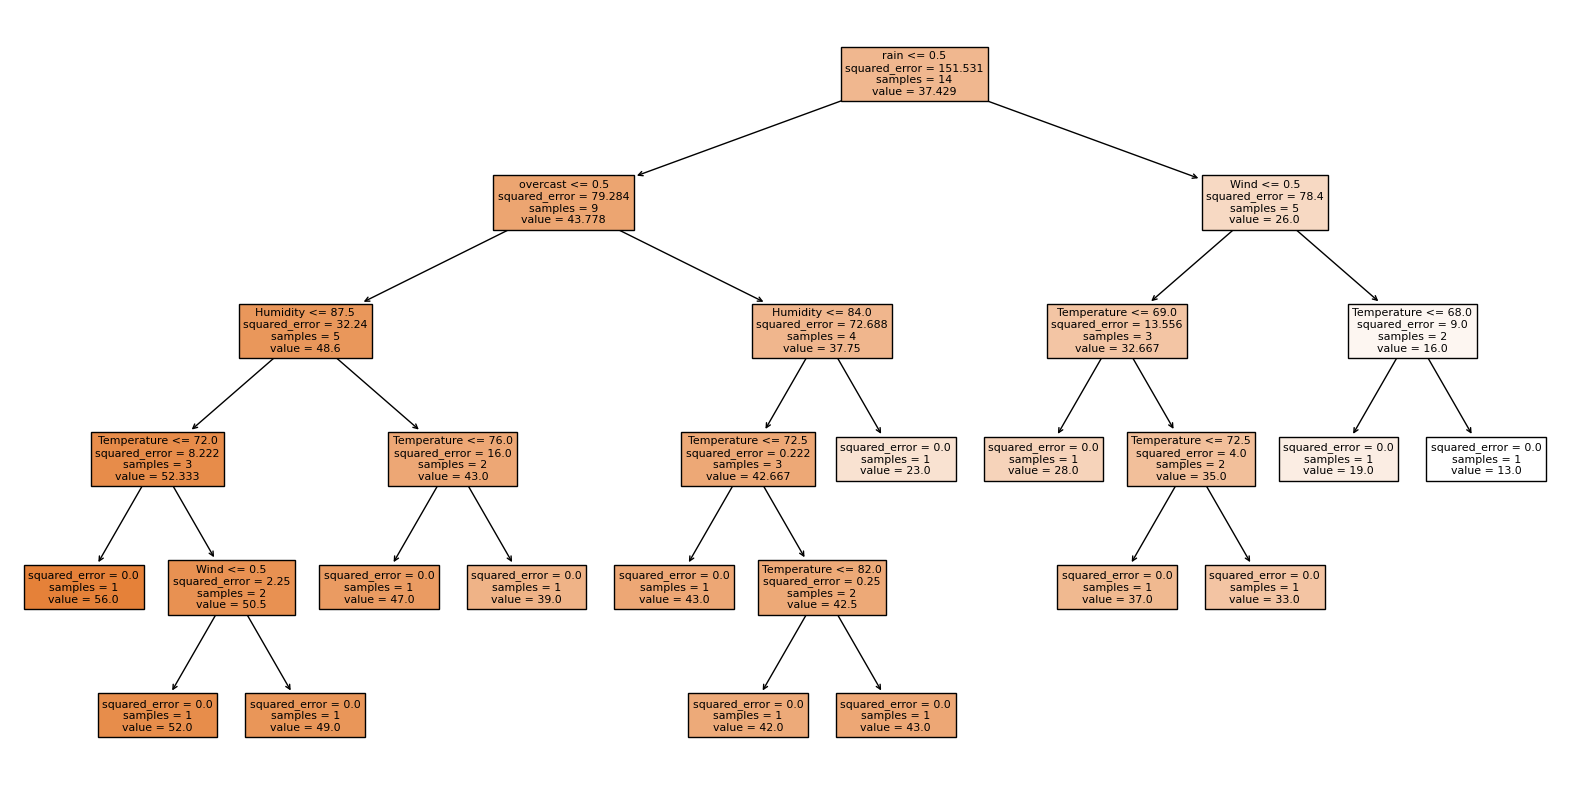

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# The whole Training Phase above is done inside sklearn like this
dt_reg = DecisionTreeRegressor(random_state=41)
dt_reg.fit(X_train, y_train)

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.show()

<div class='markdown-google-sans'>

#### **Regression Phase**
</div>
<img src="https://i.imgur.com/mCvxOpY.png" width=800 />

<img src="https://i.imgur.com/K93CmiA.png" width=800 />


In [ ]:
# Make predictions
y_pred = dt_reg.predict(X_test)
print(y_pred)

[39. 23. 33. 49. 39. 19. 23. 33. 49. 42. 52. 23. 28. 43.]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/4aqT1HH.png" width=800 />


In [ ]:
# Evaluate the Regressor
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 5.3452248382484875


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Depth of the tree**
</div>
<img src="https://i.imgur.com/vgOEEuO.png" width=800 />



In [ ]:
labels, predictions, rmses = list(y_test), [], []

k_list = [1,2, 3, None]
for k in k_list:
    dt_reg = DecisionTreeRegressor(max_depth=k, random_state=41)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)
    predictions.append(list(y_pred))
    rmses.append(mean_squared_error(y_test, y_pred, squared=False).round(2))

df_predictions = pd.DataFrame({'Label': labels}, index=X_test.index)
for k, pred in zip(k_list, predictions):
    df_predictions[f'Depth_{k}'] = pred

df_rmses = pd.DataFrame({'     RMSE': rmses}, index=[f'Depth_{k}' for k in k_list]).T

print(df_predictions.round(1))
print(df_rmses)

    Label  Depth_1  Depth_2  Depth_3  Depth_None
14     33     43.8     48.6     43.0        39.0
15     29     43.8     37.8     23.0        23.0
16     25     26.0     32.7     35.0        33.0
17     51     43.8     48.6     52.3        49.0
18     41     43.8     48.6     43.0        39.0
19     14     26.0     16.0     13.0        19.0
20     34     43.8     37.8     23.0        23.0
21     29     26.0     32.7     35.0        33.0
22     49     43.8     48.6     52.3        49.0
23     36     43.8     37.8     42.7        42.0
24     57     43.8     48.6     52.3        52.0
25     21     43.8     37.8     23.0        23.0
26     23     26.0     32.7     28.0        28.0
27     41     43.8     37.8     42.7        43.0
           Depth_1  Depth_2  Depth_3  Depth_None
     RMSE    10.15     8.16     6.03        5.35


<div class='markdown-google-sans'>

#### **Minimum samples split**
</div>
<img src="https://i.imgur.com/YBGLPBU.png" width=800 />


In [ ]:
# Initialize lists
labels, predictions, rmses = list(y_test), [], []

# Loop through different min samples split
k_list = [6,4, 3, 2]
for k in k_list:
    dt_reg = DecisionTreeRegressor(min_samples_split=k, random_state=41)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)
    predictions.append(list(y_pred))
    rmses.append(mean_squared_error(y_test, y_pred, squared=False).round(2))

# Create DataFrames
df_predictions = pd.DataFrame({'Label': labels}, index=X_test.index)
for k, pred in zip(k_list, predictions):
    df_predictions[f'MinSplit_{k}'] = pred

df_rmses = pd.DataFrame({'     RMSE': rmses}, index=[f'MinSplit_{k}' for k in k_list]).T

print(df_predictions.round(1))
print(df_rmses)

    Label  MinSplit_6  MinSplit_4  MinSplit_3  MinSplit_2
14     33        48.6        43.0        43.0        39.0
15     29        37.8        23.0        23.0        23.0
16     25        26.0        32.7        35.0        33.0
17     51        48.6        52.3        50.5        49.0
18     41        48.6        43.0        43.0        39.0
19     14        26.0        16.0        16.0        19.0
20     34        37.8        23.0        23.0        23.0
21     29        26.0        32.7        35.0        33.0
22     49        48.6        52.3        50.5        49.0
23     36        37.8        42.7        42.5        42.0
24     57        48.6        52.3        50.5        52.0
25     21        37.8        23.0        23.0        23.0
26     23        26.0        32.7        28.0        28.0
27     41        37.8        42.7        42.5        43.0
           MinSplit_6  MinSplit_4  MinSplit_3  MinSplit_2
     RMSE        8.13        6.07        6.09        5.35


<div class='markdown-google-sans'>

#### **Criterion**
</div>
<img src="https://i.imgur.com/nzEkgCP.png" width=800 />


In [ ]:
# Initialize lists
labels, predictions, rmses = list(y_test), [], []

# Loop through different criterion
criterions = ['squared_error','absolute_error','friedman_mse']
for measure in criterions:
    dt_reg = DecisionTreeRegressor(criterion=measure, random_state=42)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)
    predictions.append(list(y_pred))
    rmses.append(mean_squared_error(y_test, y_pred, squared=False).round(2))

# Create DataFrames
df_predictions = pd.DataFrame({'Label': labels})
for criterion, pred in zip(criterions, predictions):
    df_predictions[f'{criterion}'] = pred

df_rmses = pd.DataFrame({'     RMSE': rmses}, index=[f'{criterion}' for criterion in criterions]).T

print(df_predictions)
print(df_rmses)

    Label  squared_error  absolute_error  friedman_mse
0      33           39.0            39.0          39.0
1      29           23.0            23.0          23.0
2      25           33.0            33.0          33.0
3      51           49.0            39.0          49.0
4      41           39.0            39.0          39.0
5      14           13.0            13.0          13.0
6      34           23.0            23.0          23.0
7      29           33.0            33.0          33.0
8      49           49.0            52.0          49.0
9      36           43.0            43.0          43.0
10     57           52.0            39.0          52.0
11     21           23.0            23.0          23.0
12     23           28.0            28.0          28.0
13     41           43.0            43.0          43.0
           squared_error  absolute_error  friedman_mse
     RMSE           5.27            7.73          5.27


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/XqSLwiM.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Decision Tree Regressor Simplified**
</div>

RMSE: 5.3452248382484875


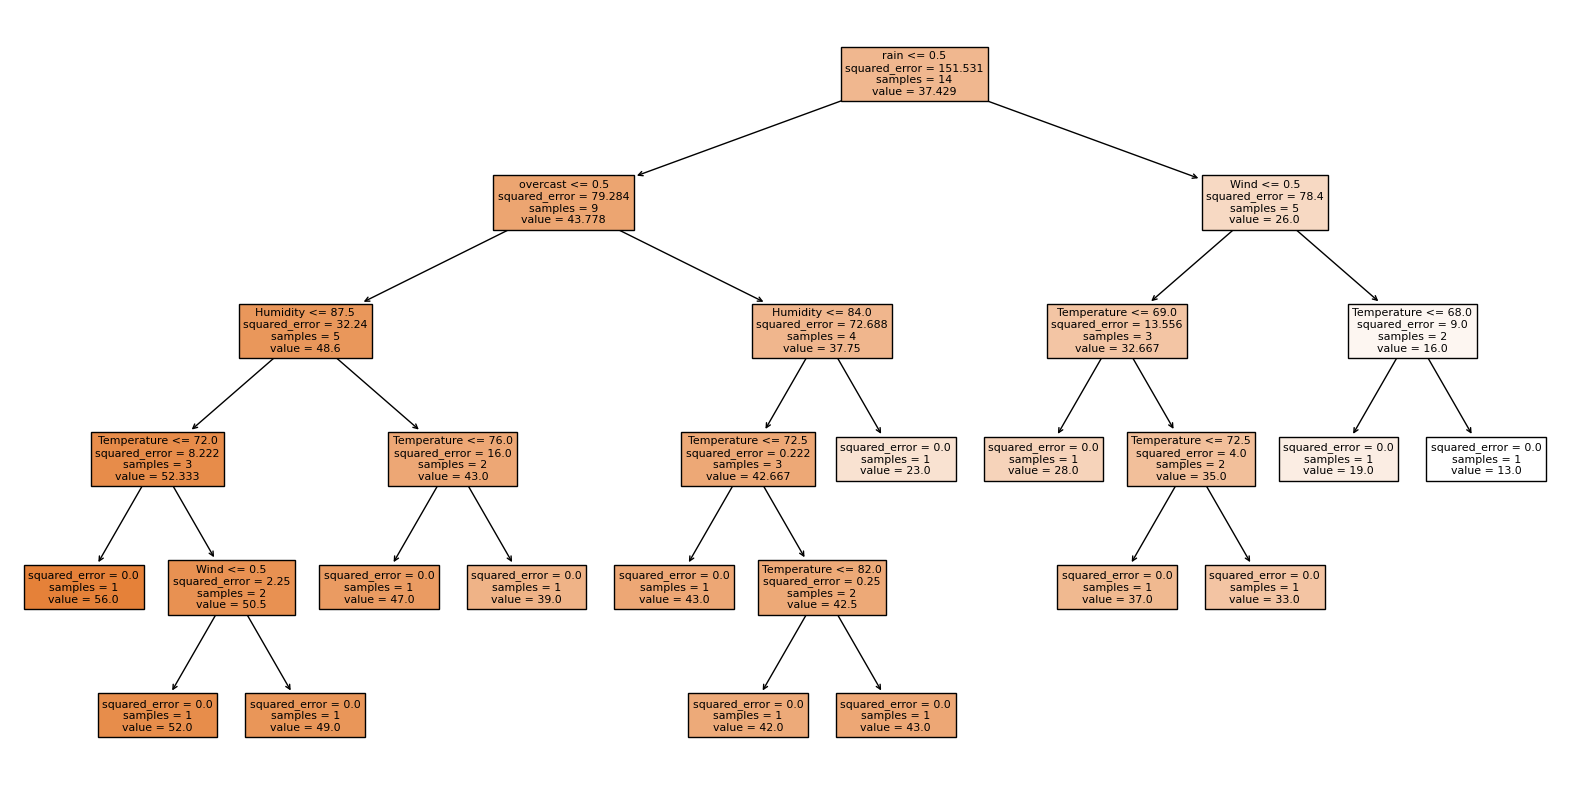

In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.tree            import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np


# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# FIT THE MODEL
dt_reg = DecisionTreeRegressor(random_state=41, max_depth=None, min_samples_split=2)
dt_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = dt_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

# PLOT THE TREE
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 05-3**
</div>
Using the following dataset, perform Regression using Decision Tree on the column `Num_Players`. Print out the RMSE and show the tree.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/oea1a7t0tkb0juw0bkhm9/golf_dataset_mini_with_testset_practice_regression.csv?rlkey=l4m32p4j2rro3lwulj076qusv&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

print(df.head())

   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Num_Players  
0              0            2  
1              0            5  
2 

RMSE: 5.3452248382484875


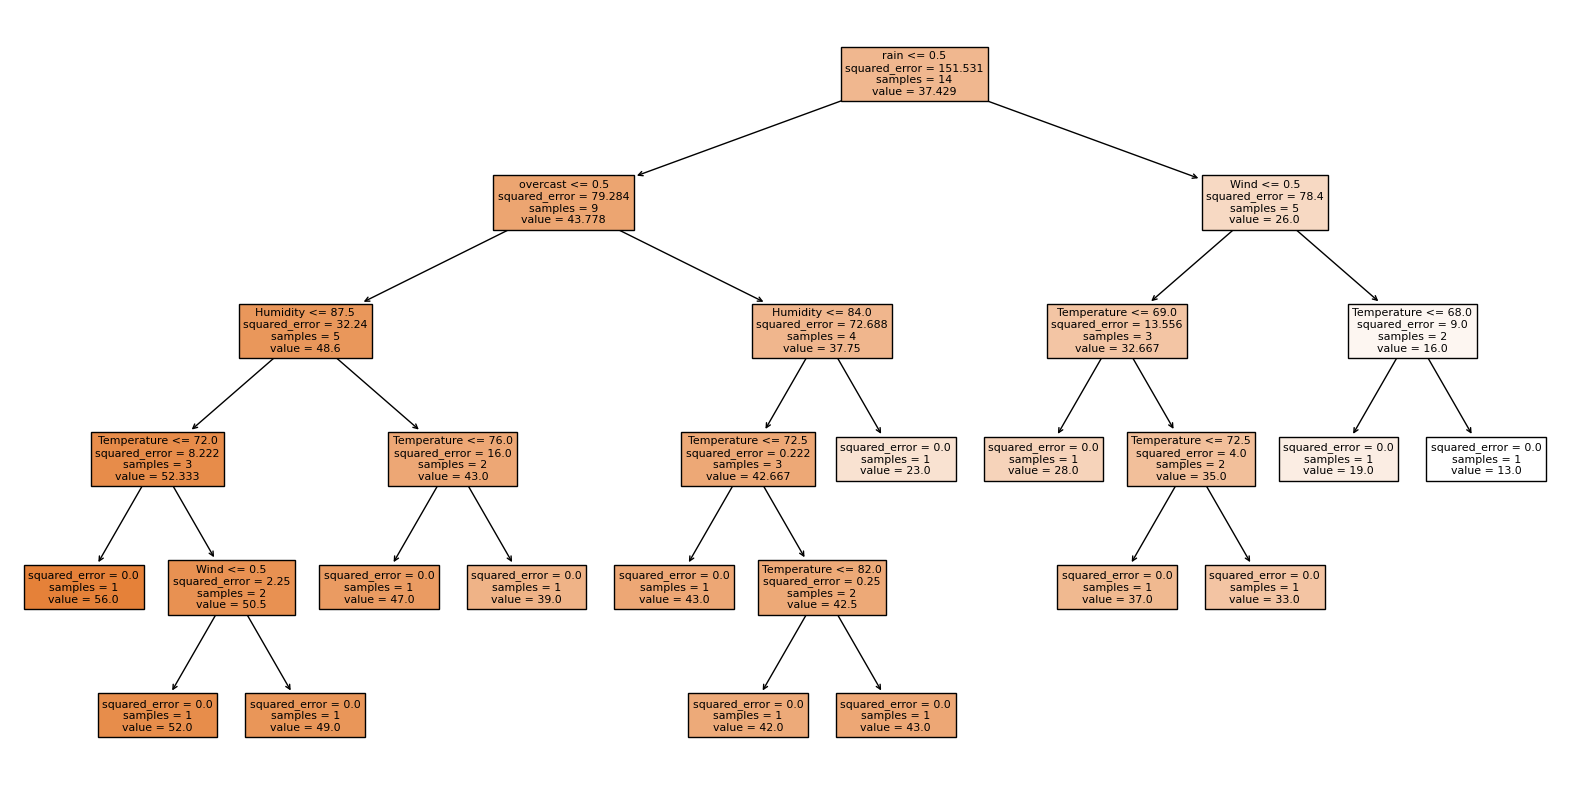

In [ ]:
# Answer
# FIT THE MODEL
dt_reg = DecisionTreeRegressor(random_state=41, max_depth=None, min_samples_split=2)
dt_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = dt_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

# PLOT THE TREE
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.show()

<div class='markdown-google-sans'>

## **05.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Linear Regression**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Linear Model & Linear Regression**
</div>
<img src="https://i.imgur.com/okn34er.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/2BAoKK9.png" width=800 />

<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/2UfIur8.png" width=800 />



In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# REORDER THE DATAFRAME
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Num_Players']]

# SPLIT DATA ── Split data into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Num_Players
0       1         0     0         85.0      85.0     0           52
1       1         0     0         80.0      90.0     1           39
2       0         1     0         83.0      78.0     0           43
3       0         0     1         70.0      96.0     0           37
4       0         0     1         68.0      80.0     0           28
5       0         0     1         65.0      70.0     1           19
6       0         1     0         64.0      65.0     1           43
7       1         0     0         72.0      95.0     0           47
8       1         0     0         69.0      70.0     0           56
9       0         0     1         75.0      80.0     0           33
10      1         0     0         75.0      70.0     1           49
11      0         1     0         72.0      90.0     1           23
12      0         1     0         81.0      75.0     0           42
13      0         0     1         71.0      80.0

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/SkIVHav.png" width=800 />


In [ ]:
from sklearn.preprocessing import StandardScaler

# STANDARDIZE NUMERICAL COLUMNS ── Apply standard scaling to numerical columns to normalize data.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(X_train[float_cols].round(2), '\n')
print(X_test[float_cols].round(2))

    Temperature  Humidity
0          1.80      0.50
1          1.02      1.02
2          1.49     -0.24
3         -0.56      1.66
4         -0.88     -0.03
5         -1.35     -1.08
6         -1.51     -1.61
7         -0.25      1.55
8         -0.72     -1.08
9          0.23     -0.03
10         0.23     -1.08
11        -0.25      1.02
12         1.17     -0.56
13        -0.41     -0.03 

    Temperature  Humidity
14         1.17      0.81
15         0.07      1.24
16         0.38      0.50
17         0.70     -0.56
18         1.33      1.24
19        -1.04      1.02
20         1.80      0.50
21        -0.09      0.81
22         2.28     -1.61
23         0.54     -1.08
24         0.86     -2.14
25         1.02      1.55
26        -1.20     -1.08
27         1.65     -0.24


<div class='markdown-google-sans'>

#### **Training Phase**
</div>

<img src="https://i.imgur.com/vdwOzLt.png" width=800 />

<img src="https://i.imgur.com/L7LrvPw.png" width=800 />




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_reg = LinearRegression(fit_intercept=True)
lr_reg.fit(X_train, y_train)

LinearRegression()

<img src="https://i.imgur.com/N4v0DF3.png" width=800 />

In [ ]:
w = lr_reg.coef_
b = lr_reg.intercept_

print(np.append(w,b).round(2))

[ 11.71   0.5  -12.22  -1.07  -2.85 -13.49  43.25]


<div class='markdown-google-sans'>

#### **Regression Phase**
</div>
<img src="https://i.imgur.com/L5x8cyE.png" width=800 />


In [ ]:
y_pred = lr_reg.predict(X_test)
print(y_pred.round(2))

[37.89 40.16 29.2  42.3  50.01 15.74 26.91 28.81 43.61 46.26 60.13 24.75
 35.41 42.67]


<img src="https://i.imgur.com/obB8T4R.png" width=800 />

In [ ]:
# Make predictions
y_pred = lr_reg.predict(X_test)
print(y_pred)

[37.88882136 40.15919225 29.20347137 42.30280951 50.00882775 15.73662214
 26.90524742 28.8110554  43.61086274 46.25921311 60.13042079 24.74921952
 35.40542457 42.66884651]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/P84IKo3.png" width=800 />


In [ ]:
result_df = pd.DataFrame({
    'ID': X_test.index,
    'Label': y_test,
    'Prediction': y_pred,
}).set_index('ID').round(2)

print(result_df)

    Label  Prediction
ID                   
14     33       37.89
15     29       40.16
16     25       29.20
17     51       42.30
18     41       50.01
19     14       15.74
20     34       26.91
21     29       28.81
22     49       43.61
23     36       46.26
24     57       60.13
25     21       24.75
26     23       35.41
27     41       42.67


In [ ]:
# Evaluate the Regressor
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 7.026046086563674


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Regularization Type**
</div>
<img src="https://i.imgur.com/LVXOb2n.png" width=800 />


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# FIT THE MODEL
lr_reg_no_regul = LinearRegression()
lr_reg_l1_regul = Lasso()
lr_reg_l2_regul = Ridge()

lr_reg_no_regul.fit(X_train, y_train)
lr_reg_l1_regul.fit(X_train, y_train)
lr_reg_l2_regul.fit(X_train, y_train)

print(np.append(lr_reg_no_regul.coef_, lr_reg_no_regul.intercept_).round(2))
print(np.append(lr_reg_l1_regul.coef_, lr_reg_l1_regul.intercept_).round(2))
print(np.append(lr_reg_l2_regul.coef_, lr_reg_l2_regul.intercept_).round(2))

[ 11.71   0.5  -12.22  -1.07  -2.85 -13.49  43.25]
[ 7.97  0.   -9.14  0.   -1.35 -7.91 41.24]
[ 9.31 -0.   -9.31  0.48 -2.58 -9.49 41.5 ]



<img src="https://i.imgur.com/dFoMYO0.png" width=800 />


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso

# FIT THE MODEL
lr_reg_no_regul = LinearRegression()
lr_reg_l1_regul = Lasso()

lr_reg_no_regul.fit(X_train, y_train)
lr_reg_l1_regul.fit(X_train, y_train)

print(np.append(lr_reg_no_regul.coef_, lr_reg_no_regul.intercept_).round(2))
print(np.append(lr_reg_l1_regul.coef_, lr_reg_l1_regul.intercept_).round(2))

[ 11.71   0.5  -12.22  -1.07  -2.85 -13.49  43.25]
[ 7.97  0.   -9.14  0.   -1.35 -7.91 41.24]



<img src="https://i.imgur.com/6BPmCO9.png" width=800 />


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

# FIT THE MODEL
lr_reg_no_regul = LinearRegression()
lr_reg_l2_regul = Ridge()

lr_reg_no_regul.fit(X_train, y_train)
lr_reg_l2_regul.fit(X_train, y_train)

print(np.append(lr_reg_no_regul.coef_, lr_reg_no_regul.intercept_).round(2))
print(np.append(lr_reg_l2_regul.coef_, lr_reg_l2_regul.intercept_).round(2))

[ 11.71   0.5  -12.22  -1.07  -2.85 -13.49  43.25]
[ 9.31 -0.   -9.31  0.48 -2.58 -9.49 41.5 ]


<div class='markdown-google-sans'>

#### **Regularization Strength**
</div>
<img src="https://i.imgur.com/JGtvIV8.png" width=800 />

<img src="https://i.imgur.com/gO7MxCe.png" width=800 />

In [ ]:
from sklearn.linear_model import Lasso

# Define alphas
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Prepare the table columns
columns = ['Alpha'] + [f'{i}' for i in X_train.columns] + ['Intercept', 'RMSE']
results = []

# Fit Lasso model for each alpha and compute metrics
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = lasso_reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Combine results into a single row
    row = [alpha] + lasso_reg.coef_.tolist() + [lasso_reg.intercept_, rmse]
    results.append(row)

# Convert results to a DataFrame and print rounded to 3 decimal places
results_df = pd.DataFrame(results, columns=columns).set_index("Alpha")
print(results_df.round(3))

          sunny  overcast    rain  Temperature  Humidity    Wind  Intercept  \
Alpha                                                                         
0.001    11.203       0.0 -12.713       -1.070    -2.848 -13.484     43.747   
0.010    11.175       0.0 -12.657       -1.037    -2.840 -13.420     43.709   
0.100    10.882       0.0 -12.101       -0.702    -2.761 -12.778     43.341   
1.000     7.973       0.0  -9.141        0.000    -1.354  -7.911     41.236   
10.000    0.000       0.0  -0.000        0.000    -0.000  -0.000     37.429   
100.000   0.000       0.0  -0.000        0.000    -0.000  -0.000     37.429   

           RMSE  
Alpha            
0.001     7.024  
0.010     7.008  
0.100     6.865  
1.000     7.203  
10.000   12.199  
100.000  12.199  


<img src="https://i.imgur.com/uBMOhNb.png" width=800 />


In [ ]:
from sklearn.linear_model import Ridge

# Define alphas
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Prepare the table columns
columns = ['Alpha'] + [f'{i}' for i in X_train.columns] + ['Intercept', 'RMSE']
results = []

# Fit Lasso model for each alpha and compute metrics
for alpha in alphas:
    lasso_reg = Ridge(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = lasso_reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Combine results into a single row
    row = [alpha] + lasso_reg.coef_.tolist() + [lasso_reg.intercept_, rmse]
    results.append(row)

# Convert results to a DataFrame and print rounded to 3 decimal places
results_df = pd.DataFrame(results, columns=columns).set_index("Alpha")
print(results_df.round(3))

          sunny  overcast    rain  Temperature  Humidity    Wind  Intercept  \
Alpha                                                                         
0.001    11.708     0.503 -12.211       -1.072    -2.848 -13.485     43.244   
0.010    11.680     0.495 -12.175       -1.051    -2.846 -13.434     43.221   
0.100    11.408     0.420 -11.828       -0.853    -2.822 -12.943     43.005   
1.000     9.307    -0.002  -9.306        0.477    -2.580  -9.491     41.496   
10.000    3.504    -0.102  -3.401        1.970    -1.257  -2.700     38.578   
100.000   0.522     0.006  -0.528        0.553    -0.168  -0.364     37.585   

           RMSE  
Alpha            
0.001     7.025  
0.010     7.012  
0.100     6.894  
1.000     6.506  
10.000    8.834  
100.000  11.542  


In [ ]:
from sklearn.linear_model import ElasticNet

# Define alphas
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Prepare the table columns
columns = ['Alpha'] + [f'{i}' for i in X_train.columns] + ['Intercept', 'RMSE']
results = []

# Fit Lasso model for each alpha and compute metrics
for alpha in alphas:
    lasso_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
    lasso_reg.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = lasso_reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Combine results into a single row
    row = [alpha] + lasso_reg.coef_.tolist() + [lasso_reg.intercept_, rmse]
    results.append(row)

# Convert results to a DataFrame and print rounded to 3 decimal places
results_df = pd.DataFrame(results, columns=columns).set_index("Alpha")
print(results_df.round(3))

          sunny  overcast    rain  Temperature  Humidity    Wind  Intercept  \
Alpha                                                                         
0.001    11.650     0.458 -12.222       -1.056    -2.846 -13.448     43.265   
0.010    11.176     0.122 -12.214       -0.897    -2.828 -13.066     43.364   
0.100     9.707     0.000  -9.933        0.147    -2.588 -10.204     41.882   
1.000     3.827    -0.000  -3.705        1.794    -1.082  -2.816     38.592   
10.000    0.000     0.000  -0.000        0.000    -0.000  -0.000     37.429   
100.000   0.000     0.000  -0.000        0.000    -0.000  -0.000     37.429   

           RMSE  
Alpha            
0.001     7.015  
0.010     6.920  
0.100     6.533  
1.000     8.838  
10.000   12.199  
100.000  12.199  


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/KXuiDsH.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Linear Regression Simplified**
</div>

In [ ]:
# IMPORTING DATASET
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics         import mean_squared_error
from sklearn.tree            import DecisionTreeRegressor, plot_tree
import pandas as pd
import numpy  as np

# READ THE DATA
dataset_url = "https://www.dropbox.com/scl/fi/aeeyndtko0i35yf4s7e6g/golf_dataset_mini_numplayers.csv?rlkey=u2q8zvev6xid21hyxh4xwx5zy&st=5632zytr&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) COLUMN TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)

# SPLIT DATA
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# STANDARDIZE NUMERICAL COLUMNS
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT THE MODEL (Choose one model below)
lr_reg = LinearRegression()
#lr_reg = Lasso(alpha=10)
#lr_reg = Ridge(alpha=10)
#lr_reg = ElasticNet(alpha=10, l1_ratio=0.25)
lr_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = lr_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 7.026046086563681


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 05-4**
</div>
Using the following dataset, perform Ridge Regression (with alpha=10) on the column 'Num_Players'. Print out the RMSE.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/oea1a7t0tkb0juw0bkhm9/golf_dataset_mini_with_testset_practice_regression.csv?rlkey=l4m32p4j2rro3lwulj076qusv&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

print(df.head())

   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Num_Players  
0              0            2  
1              0            5  
2 

In [ ]:
# Answer
# FIT THE MODEL (Choose one model below)
# lr_reg = LinearRegression()
#lr_reg = Lasso(alpha=10)
lr_reg = Ridge(alpha=10)
#lr_reg = ElasticNet(alpha=10, l1_ratio=0.25)
lr_reg.fit(X_train, y_train)

# PREDICT THE TEST DATA
y_pred = lr_reg.predict(X_test)

# EVALUATE THE MODEL
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 8.834149689910857


<div class='markdown-google-sans'>

## **05.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Support Vector Regression**
</div>

Similar concept as SVC, this is for self-study. [Scikit-learn link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

<div class='markdown-google-sans'>

### 📊　Dataset & Libraries Used
</div>

The following is the dataset that you will use for this exercise (same as the previous exercise). This is a one-year weather dataset in Golf Land.
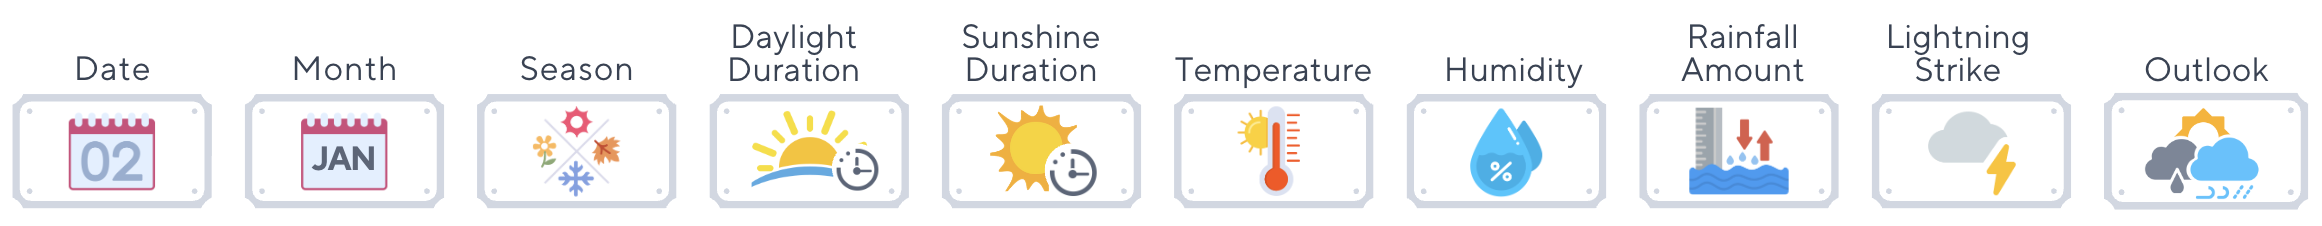
1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

🎯 **Goal**:

Based on all the other weather conditions, can we predict the **amount of rainfall** happening in a day?

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for data manipulation, plotting, and model evaluation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# READ DATA ── Load the dataset from the specified URL and set 'Date' as the index column.
dataset_url = "https://www.dropbox.com/scl/fi/bce2re8zx8539jeimprg7/golf_dataset_weather_seasonal_1year.csv?rlkey=7vkl6bq9c55jujeh9do29ty91&dl=0&raw=1"
golf_dataset = pd.read_csv(dataset_url, index_col='Date')

# DISPLAY DATA ── Print the DataFrame to review the loaded data.
print(golf_dataset)


      Month  Season  DaytimeDuration  SunshineDuration  Temperature  Humidity  \
Date                                                                            
01-01   Jan  Winter            9.571             8.862        5.910    44.790   
01-02   Jan  Winter            9.582             5.834        3.187    52.813   
01-03   Jan  Winter            9.595             1.660       -1.167    45.567   
01-04   Jan  Winter            9.608             8.236        5.359    54.341   
01-05   Jan  Winter            9.622             2.182        2.597    52.103   
...     ...     ...              ...               ...          ...       ...   
12-27   Dec  Winter            9.528             4.016        9.565    45.635   
12-28   Dec  Winter            9.534             5.803       11.979    47.221   
12-29   Dec  Winter            9.541             0.741        7.978    53.422   
12-30   Dec  Winter            9.550             1.273        9.274    57.226   
12-31   Dec  Winter         

<div class='markdown-google-sans'>

## **5.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dummy Regressor**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import libraries for dummy regression and data processing.
from sklearn.dummy import DummyRegressor

# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.
df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)

# SPLIT DATA ── Split data into training and test sets with 60% training size.
X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# FIT MODEL ── Initialize and train Dummy Regressor with 'mean' strategy.
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = dummy_reg.predict(X_test)

# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

RMSE: 12.535546723871038


<div class='markdown-google-sans'>

## **5.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**kNN Regressor**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for k-Nearest Neighbors regression and data scaling.
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.preprocessing   import StandardScaler

# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# SCALE DATA ── Scale the numerical variables  appropriately using the method from previous exercises.

scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])
# FIT MODEL ── Initialize and train k-Nearest Neighbors Regressor with chosen parameters.

knn_reg = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
knn_reg.fit(X_train, y_train)
# PREDICT ── Use the trained model to predict test data.
y_pred = knn_reg.predict(X_test)

# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")


RMSE: 8.025275136110535


<div class='markdown-google-sans'>

## **5.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Decision Tree Regressor**
</div>

RMSE: 9.63621362432873


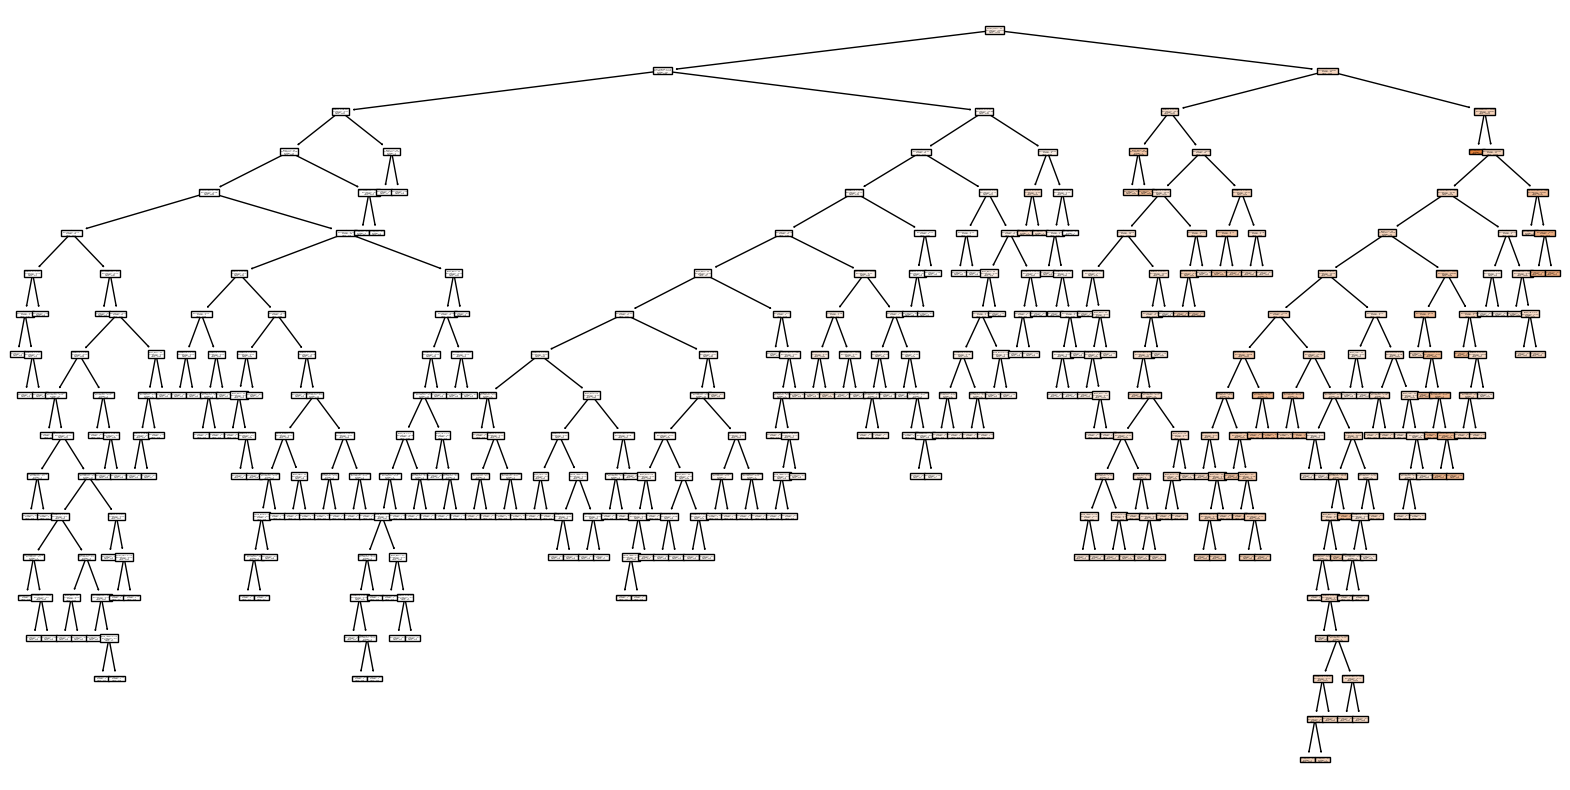

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for decision tree regression and model visualization.
from sklearn.tree            import DecisionTreeRegressor, plot_tree

# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# FIT MODEL ── Initialize and train Decision Tree Regressor with default parameters.
dt_reg = DecisionTreeRegressor(random_state=41, max_depth=None, min_samples_split=2)
dt_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = dt_reg.predict(X_test)

# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.

print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
# SHOW TREE ── Print and visualize the decision tree.
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.show()

RMSE: 9.015163639784358


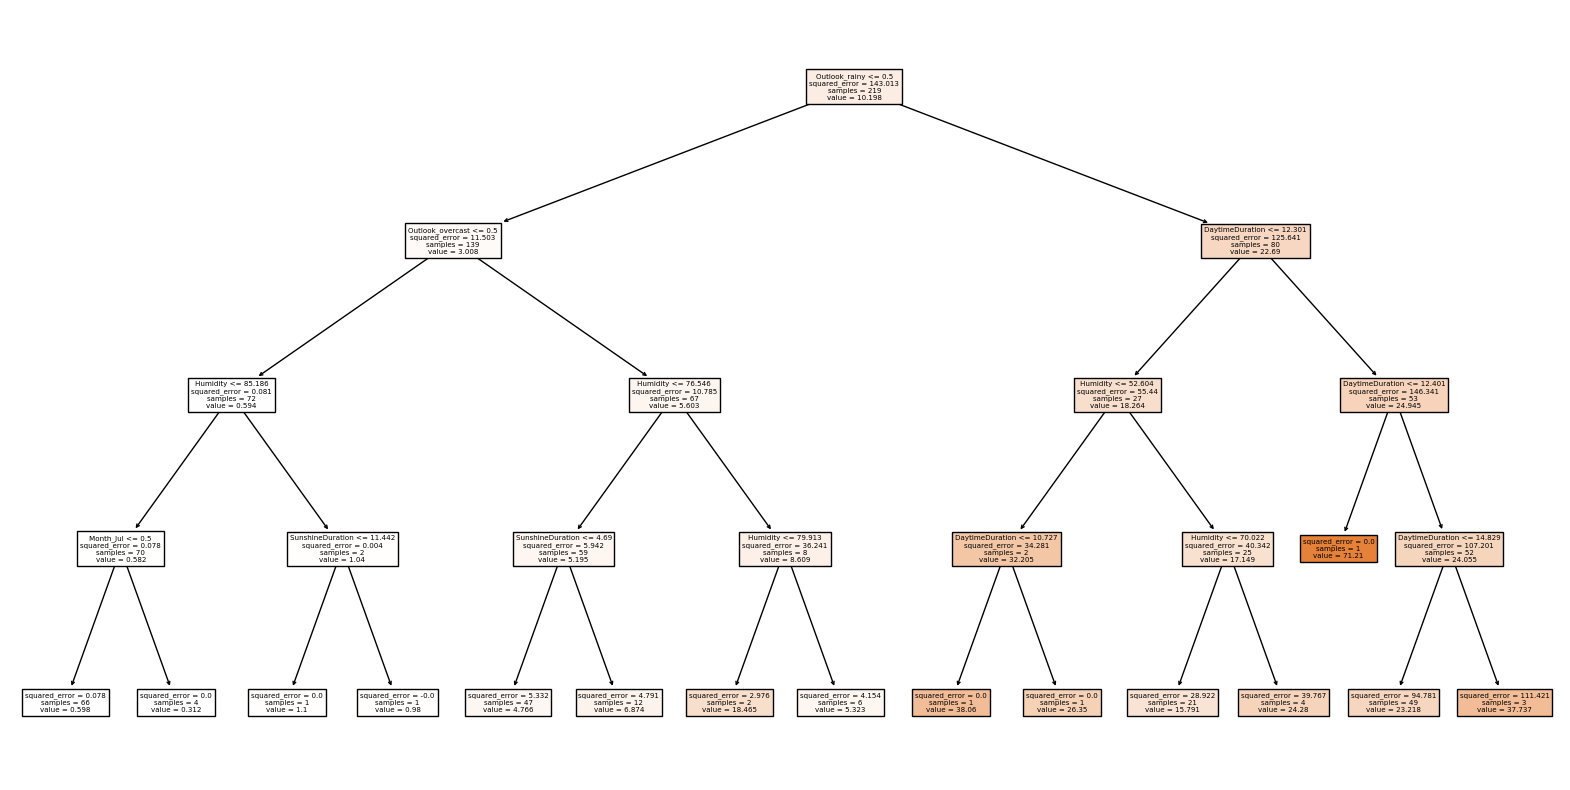

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for decision tree regression and model visualization.


# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.


# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.


# FIT MODEL ── Initialize and train Decision Tree Regressor with non-default parameters (e.g., set max depth and/or minimum samples).


# PREDICT ── Use the trained model to predict test data.


# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.


# SHOW TREE ── Print and visualize the decision tree.

# IMPORT LIBRARIES ── Import libraries necessary for decision tree regression and model visualization.
from sklearn.tree            import DecisionTreeRegressor, plot_tree

# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# FIT MODEL ── Initialize and train Decision Tree Regressor with default parameters.
dt_reg = DecisionTreeRegressor(random_state=41, max_depth=4, min_samples_split=2)
dt_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = dt_reg.predict(X_test)

# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.

print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
# SHOW TREE ── Print and visualize the decision tree.
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.show()



<div class='markdown-google-sans'>

## **5.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Linear Regression**
</div>

In [ ]:
# A. LINEAR REGRESSION
# IMPORT LIBRARIES ── Import libraries necessary for linear regression and data scaling.
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet


# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and train Linear Regression model.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = lr_reg.predict(X_test)


# SHOW COEFFICIENTS AND INTERCEPT ── Print the coefficients (weights) and the intercept (bias) of the model.
x, y = lr_reg.coef_, lr_reg.intercept_
print(f"Coefficients: {x}")
print(f"Intercept: {y}")

# EVALUATE MODEL ── Calculate and print the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")


Coefficients: [-8.99093854e-01  3.18438624e-01  3.47351867e-01 -4.21697676e-01
  1.82808479e-01 -1.20813702e+00 -1.16881536e+00 -1.01448791e+00
  4.97821527e-01 -6.14485503e-01  4.35680547e+00  2.92741159e+00
 -2.09634132e+00  7.10477892e-01 -2.49851257e+00 -2.06981256e+00
  2.17807577e+00 -5.98994183e-01  1.51320152e+00  1.19101052e-02
 -9.26117446e-01 -1.21668443e+00  1.39641603e+01 -5.67397028e+00
 -7.07350554e+00]
Intercept: 6.835998882000139
RMSE: 7.747852516023916


In [ ]:
# B. LASSO REGRESSION
# IMPORT LIBRARIES ── Import libraries necessary for Lasso regression and data scaling.


# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.


# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.


# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.


# FIT MODEL ── Initialize and train Lasso Regression model, adjusting the regularization strength for best RMSE.


# PREDICT ── Use the trained model to predict test data.


# SHOW COEFFICIENTS AND INTERCEPT ── Print the coefficients (weights) and the intercept (bias) of the model.


# EVALUATE MODEL ── Calculate and print the accuracy of the model.

# IMPORT LIBRARIES ── Import libraries necessary for linear regression and data scaling.
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet


# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and train Linear Regression model.
lr_reg = Lasso(alpha = 0.1)
lr_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = lr_reg.predict(X_test)


# SHOW COEFFICIENTS AND INTERCEPT ── Print the coefficients (weights) and the intercept (bias) of the model.
x, y = lr_reg.coef_, lr_reg.intercept_
print(f"Coefficients: {x}")
print(f"Intercept: {y}")

# EVALUATE MODEL ── Calculate and print the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")



Coefficients: [ 1.29902901 -0.          0.         -0.          0.34715454 -0.
 -1.93152906  0.20394671  0.         -0.          0.11273647  0.
 -0.60728978  0.         -0.         -0.09798061  0.71755863 -0.
  0.          0.         -0.          0.59033841 14.66974275 -0.69721602
 -3.13550224]
Intercept: 4.2077605025280045
RMSE: 7.627443253484591


In [ ]:
# C. RIDGE REGRESSION
# IMPORT LIBRARIES ── Import libraries necessary for Ridge regression and data scaling.


# COPY DATA ── Create a copy of the dataset.


# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.


# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.


# FIT MODEL ── Initialize and train Ridge Regression model, adjusting the regularization strength for best RMSE.


# PREDICT ── Use the trained model to predict test data.


# SHOW COEFFICIENTS AND INTERCEPT ── Print the coefficients (weights) and the intercept (bias) of the model.


# EVALUATE MODEL ── Calculate and print the accuracy of the model.
# IMPORT LIBRARIES ── Import libraries necessary for linear regression and data scaling.
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet


# COPY AND ENCODE DATA ── Create a copy of the dataset and one-hot encode categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.

X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)

# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and train Linear Regression model.
lr_reg = Ridge(alpha = 1)
lr_reg.fit(X_train, y_train)

# PREDICT ── Use the trained model to predict test data.
y_pred = lr_reg.predict(X_test)


# SHOW COEFFICIENTS AND INTERCEPT ── Print the coefficients (weights) and the intercept (bias) of the model.
x, y = lr_reg.coef_, lr_reg.intercept_
print(f"Coefficients: {x}")
print(f"Intercept: {y}")

# EVALUATE MODEL ── Calculate and print the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")



Coefficients: [ 1.39502651e-01  1.32768979e-01  2.87746309e-01 -3.39317431e-01
  2.64835953e-01 -1.11992559e+00 -1.99152602e+00  3.86990702e-01
  8.82288111e-01  6.82359870e-02  2.84483102e+00  1.60119985e+00
 -1.86886189e+00 -1.27666247e-02 -1.35699704e+00 -1.37419788e+00
  1.94072937e+00 -5.38893870e-01  1.20685701e+00  7.11976260e-02
 -7.39160762e-01 -1.38279065e+00  1.29775573e+01 -5.03968895e+00
 -6.55507765e+00]
Intercept: 6.769658766831029
RMSE: 7.739780936549804


<div class='markdown-google-sans'>

## **5.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Support Vector Regression**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for Support Vector Regression (SVR) and data scaling.
from sklearn.svm import SVR

# COPY DATA ── Create a copy of the dataset.
df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)

# SPLIT DATA ── Split data into training and test sets with the same method as in Dummy Regressor.
X, y = df.drop('RainfallAmount', axis=1), df['RainfallAmount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42
)


# SCALE DATA ── Scale the numerical variables using the same method as kNN Regressor.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and train Support Vector Regression model,
#               adjusting the kernel and regularization parameters for best RMSE.
svr_reg = SVR(kernel='linear', C=10)
svr_reg.fit(X_train, y_train)


# PREDICT ── Use the trained model to predict test data.
y_pred = svr_reg.predict(X_test)

# EVALUATE MODEL ── Calculate and print the Root Mean Squared Error (RMSE) for model evaluation.
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")



RMSE: 7.6521798807735815
